In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(trainx, trainy), (testx, testy) = mnist.load_data()

In [4]:
trainx.shape, trainy.shape, testx.shape, testy.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 0, '4')

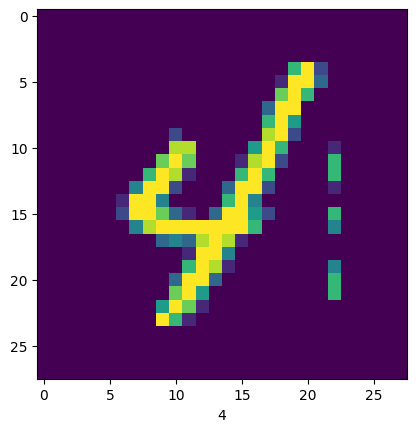

In [5]:
def choose_random_train():
    random_number = np.random.randint(0, 60000)
    return random_number

random_number = choose_random_train()
random_x = trainx[random_number]
random_y = trainy[random_number]

plt.imshow(random_x)
plt.xlabel(random_y)

    

In [25]:
# making a forward propagation model

# Plan
# Start with 28x28 input layer, which takes the flattened input
# Implement all the layers as a class

class Flattener:
    def __init__(self, shape):
        self.name = f"Flattener         : {shape} to {np.prod(shape)}"
        self.from_shape = shape
        self.param_count = 0
    def apply(self, data):
        return np.ndarray.flatten(data)

    def calculate_gradient(self, output_gradient, my_output=None, my_input=None):
        return np.ndarray.reshape(output_gradient, self.from_shape)
    
    def back_prop(self, output_gradient, my_output, my_input):
        my_gradient = 0
        input_gradient = self.calculate_gradient(output_gradient, my_output, )
        return input_gradient, my_gradient

    def learn(self, grad, learning_rate):
        pass

# Then a simple linear model with weights only
class Weights:
    def __init__(self, input_size, output_size):
        self.name = f"Weights layer     : {input_size} to {output_size}"
        self.input_size = input_size
        self.output_size = output_size
        self.param_count = input_size * output_size

        # We need to store transposed weights because the input is a row vector
        self.weights = np.random.rand(input_size, output_size)*2 - 1
    
    def apply(self, data):
        return np.matmul(data, self.weights)
    
    def calculate_gradient(self, output_gradient, my_output, my_input):
        return np.transpose(np.matmul(self.weights, np.transpose(output_gradient)))
    
    def back_prop(self, output_gradient, my_output, my_input):
        my_gradient = np.matmul(np.transpose(my_input), output_gradient)
        input_gradient = self.calculate_gradient(input_gradient)
        return input_gradient, my_gradient

    def learn(self, grad, learning_rate):
        self.weights -= grad * learning_rate
        pass
    
class Biases:
    def __init__(self, input_size):
        self.name = f"Biases layer      : {input_size}"
        self.input_size = input_size
        self.biases = np.random.rand(input_size) * 2 - 1
        self.param_count = input_size
    
    def apply(self, data):
        return data + self.biases
    
    def calculate_gradient(self, output_gradient, my_output, my_input):
        return output_gradient

    def back_prop(self, output_gradient, my_output, my_input):
        my_gradient = output_gradient
        input_gradient = self.calculate_gradient(input_gradient)
        return input_gradient, my_gradient

    def learn(self, grad, learning_rate):
        self.biases -= grad * learning_rate
        pass
    
class ReluActivation:
    def __init__(self, input_size = None):
        self.name = "ReLU activation"
        self.input_size = input_size
        self.function = lambda x: 0 if x <= 0 else x
        self.vectorized_function = np.vectorize(self.function)
        self.vectorized_gradient = np.vectorize(lambda x: 1 if x >= 0 else 0)
        self.param_count = 0

    def apply(self, data):
        return self.vectorized_function(data)

    def calculate_gradient(self, output_gradient, my_output, my_input):
        return np.multiply(np.vectorized_gradient(my_output), output_gradient)
    
    def back_prop(self, output_gradient, my_output, my_input):
        my_gradient = 0
        input_gradient = self.calculate_gradient(my_output, output_gradient) 
        return input_gradient, my_gradient
        
    def learn(self, grad, learning_rate):
        pass

class SoftMaxActivation:
    def __init__(self, input_size = None):
        self.name = "Softmax activation"
        self.input_size = input_size
        self.param_count = 0
    
    def apply(self, data):
        maximum_value = np.max(data)
        new_data = np.exp(data - maximum_value)
        denominator = np.sum(new_data)
        new_data /= denominator
        return new_data
    
    def test_gradient(self, my_output, output_gradient):
        # Through thorough calculations, though tough,
        # Gradient of softmax is calculated as
        # 
        
        return np.multiply(-2*my_output, my_output - 1)
        pass
    
    def calculate_gradient(self, output_gradient, my_output, my_input):
        # gives gradient of input with respect to loss
        # from the value of outputs, and their gradient with respect to loss
        my_size = len(my_output)

        matrix = np.matmul(my_output, np.identity(my_size)) - np.matmul(my_output, np.transpose(my_output))
        return np.matmul(my_output, matrix)
    
    def back_prop(self, output_gradient, my_output, my_input):
        my_gradient = 0
        input_gradient = self.calculate_gradient(my_output, output_gradient)
        return input_gradient, my_gradient
    
    def learn(self, grad, learning_rate):
        pass

class CrossEntropyLossFunction:
    def __init__(self, input_size = None):
        self.input_size = None
        self.name = "Cross Entropy Loss Function"
    
    def apply(self, predicted_value, ground_truth):
        # function of loss funtion
        return np.sum(np.multiply(ground_truth, np.log(predicted_value)))
    
    def true_gradient(self, predicted_value, ground_truth):
        return np.divide(-ground_truth, predicted_value)
    
    # def gradient_from_logits(self, predicted_value, ground_truth):
    #     if np.shape(ground_truth) != 1:
    #         ground_truth = np.argmax(ground_truth)
        #
        
        
            
        
    
    def __call__(self, predicted_value, ground_truth):
        return self.apply(predicted_value, ground_truth)

    

        
        
    
    # def apply(self, data):
        
# flattener = np.ndarray.flatten


In [ ]:

class Model:
    def __init__(self, layers, loss_function=None):
        self.layers = layers
        self.save_outputs = [None] * (len(layers) + 1)
        self.gradients = [None] * (len(layers) + 1)
        self.param_count = sum(layer.param_count for layer in layers)
        self.loss_function = None
    
    def forward_prop(self, input):
        intermediate_output = input
        self.save_outputs[i] = intermediate_output
        for i, layer in enumerate(self.layers):
            intermediate_output = layer.apply(intermediate_output)
            self.save_outputs[i+1] = intermediate_output
        
        return intermediate_output
    
    def back_prop(self, loss_gradient):
        last_gradient = loss_gradient
        for i, layer in enumerate(self.layers)[::-1]:
            input_grad, self_grad = layer.back_prop(last_gradient, self.save_outputs[i+1], self.save_outputs[i])
            prvi, prvg = self.gradients[i]
            prvi += input_grad
            prvg += self_grad
    
    def back_prop_reset(self):
        self.gradients = [None] * (len(self.layers) + 1)
    
    def learn(self, learning_rate):
        for grad, layer in zip(self.gradients, self.layers):
            layer.learn(grad, learning_rate)
    
    def __call__(self, input):
        return self.forward_prop(input)
    
    def __repr__(self):
        representation = "" 
        i = 0
        for layer in self.layers:
            i += 1
            representation += f"{i}. {layer.name}\n"
        representation += f"Total parameters = {self.param_count}\n"
        representation += f"Loss function = {self.loss_function.name}\n"
        return representation

    # def back_prop(self, output_gradients):
        # self.save_gradients = [None] * len(layers)
        

In [26]:
# Building a model
model = Model([
    Flattener(shape=(28, 28)),

    Weights(28*28, 512),
    Biases(512),
    ReluActivation(),

    Weights(512, 200),
    Biases(200),
    ReluActivation(),

    Weights(200, 50),
    Biases(50),
    ReluActivation(),

    Weights(50, 10),
    Biases(10),

    SoftMaxActivation()
],
              loss_function=CrossEntropyLossFunction())

print(model)
model(random_x)

1. Flattener         : (28, 28) to 784
2. Weights layer     : 784 to 512
3. Biases layer      : 512
4. ReLU activation
5. Weights layer     : 512 to 200
6. Biases layer      : 200
7. ReLU activation
8. Weights layer     : 200 to 50
9. Biases layer      : 50
10. ReLU activation
11. Weights layer     : 50 to 10
12. Biases layer      : 10
13. Softmax activation
Total parameters = 515080


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

(512,)
(512,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Text(0, 0.5, 'Output after softmax')

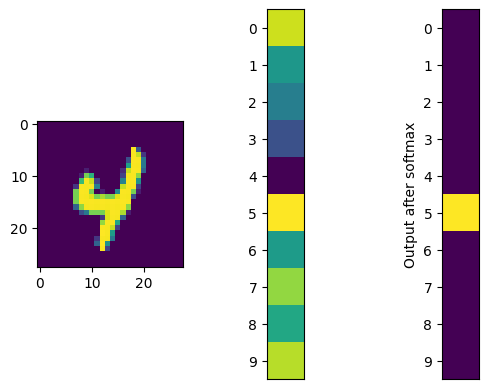

In [8]:
# Getting input

random = choose_random_train()
random_x = trainx[random]
random_y = trainy[random]


# Test
flattener = Flattener(shape=(28,28))

weights_layer = Weights(28*28, 512)
bias_layer = Biases(512)
activation_layer = ReluActivation()

another_weights_layer = Weights(512, 10)
another_bias_layer = Biases(10)
another_activation_layer = SoftMaxActivation()

plt.subplot(1,3,1)
plt.imshow(random_x)

input = random_x
flattened_output = flattener.apply(input)
weighted_output = weights_layer.apply(flattened_output)
biased_output = bias_layer.apply(weighted_output)
activated_output = activation_layer.apply(biased_output)

another_weighted_output = another_weights_layer.apply(activated_output)
another_biased_output = another_bias_layer.apply(another_weighted_output)
another_activated_output = another_activation_layer.apply(another_biased_output)

numpy_image = np.reshape(another_activated_output, (-1,1))

print(weighted_output.shape)
print(biased_output.shape)
print(another_activated_output)

plt.subplot(1,3,2)
plt.imshow(np.reshape(another_biased_output, (-1,1)))
plt.yticks(np.arange(10))
plt.xticks([])
plt.ylabel("")

plt.subplot(1,3,3)
plt.imshow(numpy_image)
plt.yticks(np.arange(10))
plt.xticks([])
plt.ylabel("Output after softmax")